<a href="https://colab.research.google.com/github/dhruvk98/Machine-Learning-Datasets/blob/master/pima_diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pima Indian Diabetes Database
A binary classification problem to determine whether or not a person has chances of getting diabetes.

Dataset link: https://www.kaggle.com/uciml/pima-indians-diabetes-database

## Upload and extract data

In [0]:
# Binary classification problem
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [0]:
df = pd.read_csv('diabetes.csv',sep=',',encoding='utf=8')

In [0]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Exploratory Data Analysis

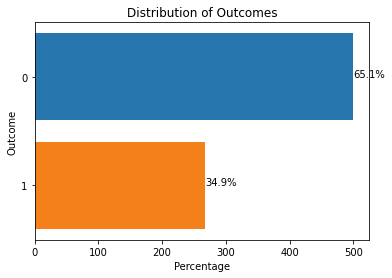

<Figure size 1008x576 with 0 Axes>

In [0]:
# distribution of outcome class
ax = sns.countplot(y='Outcome',data=df,saturation=0.9)
total = len(df['Outcome'])

for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.title('Distribution of Outcomes')
plt.xlabel('Percentage')
plt.figure(figsize=(14,8))
plt.show()

In [0]:
df.describe().T # .T gives us transpose and better readability

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


From this we observe that some columns have minimum values (of zero) that shouldn't be possible. These columns are:
1. Glucose
2. BloodPressure
3. SkinThickness
4. Insulin
5. BMI

This indicates that there are missing values in our dataset. Let us understand our attributes more clearly.

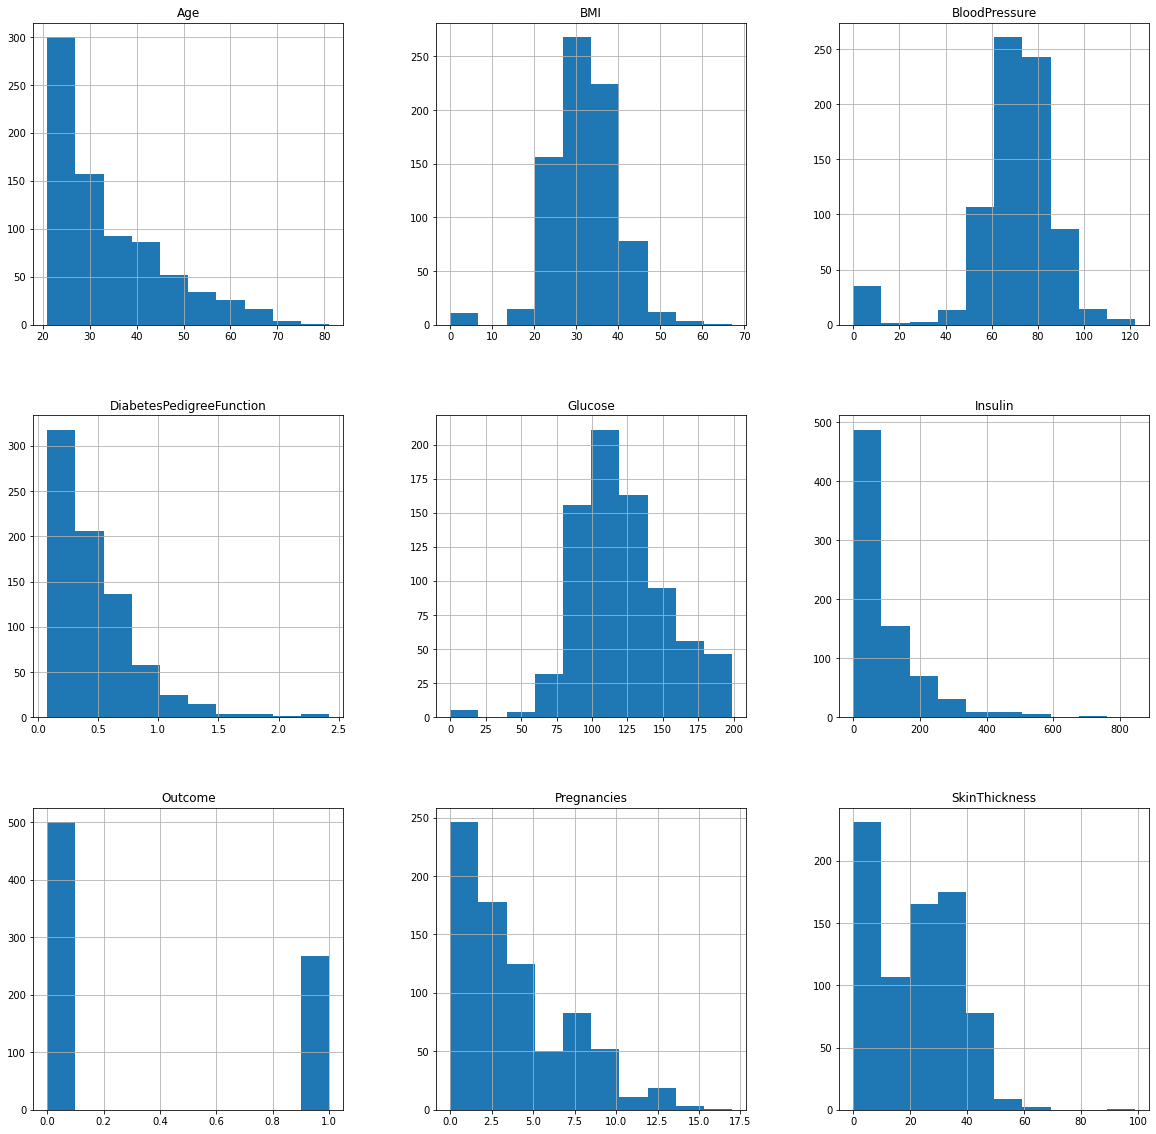

In [0]:
df.hist(bins=10,figsize=(20,20))
plt.show()

## Data Preprocessing

In [0]:
# replacing improbable zero values with null values
missing = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
df[missing] = df[missing].replace(0,np.NaN)
print(df.isna().sum()) # checking for null values

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


We will replace our NaN values in Glucose and BloodPressure with the mean values as they have normal distributions. 
Similarly, we replace SkinThickness, Insulin and BMI with their median values. 

**Note: Values of these attributes will be very different for both outcomes so we should impute them on the basis of class**

In [0]:
zero_oc = df.loc[df.Outcome==0] # dataframe of all non-diabetic patients
one_oc = df.loc[df.Outcome==1] # dataframe of all diabetic patients
print(len(zero_oc))
print(len(one_oc))

500
268


Once we've separated our dataframe on the basis of class outcomes we now calculate the imputed values. 

In [0]:
# mean values for glucose
import math
glucose_mean0 = math.floor(zero_oc.Glucose.mean())
glucose_mean1 = math.floor(one_oc.Glucose.mean())
print('Mean Glucose reading for non-diabetic patients:',glucose_mean0)
print('Mean Glucose reading for diabetic patients:',glucose_mean1)

Mean Glucose reading for non-diabetic patients: 110
Mean Glucose reading for diabetic patients: 142


In [0]:
# mean values for BloodPressure
bp_mean0 = math.floor(zero_oc.BloodPressure.mean())
bp_mean1 = math.floor(one_oc.BloodPressure.mean())
print('Mean BP reading for non-diabetic patients:',bp_mean0)
print('Mean BP reading for diabetic patients:',bp_mean1)

Mean BP reading for non-diabetic patients: 70
Mean BP reading for diabetic patients: 75


In [0]:
# median values for SkinThickness
st_median0 = math.floor(zero_oc.SkinThickness.median())
st_median1 = math.floor(one_oc.SkinThickness.median())
print('Mean SkinThickness reading for non-diabetic patients:',st_median0)
print('Mean SkinThickness reading for diabetic patients:',st_median1)

Mean SkinThickness reading for non-diabetic patients: 27
Mean SkinThickness reading for diabetic patients: 32


In [0]:
# median values for Insulin
in_median0 = math.floor(zero_oc.Insulin.median())
in_median1 = math.floor(one_oc.Insulin.median())
print('Median Insulin reading for non-diabetic patients:',in_median0)
print('Median Insulin reading for diabetic patients:',in_median1)

Median Insulin reading for non-diabetic patients: 102
Median Insulin reading for diabetic patients: 169


In [0]:
# median values for BMI
bmi_median0 = round(zero_oc.BMI.median(),1)
bmi_median1 = round(one_oc.BMI.median(),1)
print('Median BMI reading for non-diabetic patients:',bmi_median0)
print('Median BMI reading for diabetic patients:',bmi_median1)

Median BMI reading for non-diabetic patients: 30.1
Median BMI reading for diabetic patients: 34.3


In [0]:
# replacing NaN values 
# Glucose
df.loc[(df['Outcome'] == 0 ) & (df['Glucose'].isnull()), 'Glucose'] = glucose_mean0
df.loc[(df['Outcome'] == 1 ) & (df['Glucose'].isnull()), 'Glucose'] = glucose_mean1
# BloodPressure
df.loc[(df['Outcome'] == 0 ) & (df['BloodPressure'].isnull()), 'BloodPressure'] = bp_mean0
df.loc[(df['Outcome'] == 1 ) & (df['BloodPressure'].isnull()), 'BloodPressure'] = bp_mean1
# SkinThickness
df.loc[(df['Outcome'] == 0 ) & (df['SkinThickness'].isnull()), 'SkinThickness'] = st_median0
df.loc[(df['Outcome'] == 1 ) & (df['SkinThickness'].isnull()), 'SkinThickness'] = st_median1
# Insulin
df.loc[(df['Outcome'] == 0 ) & (df['Insulin'].isnull()), 'Insulin'] = in_median0
df.loc[(df['Outcome'] == 1 ) & (df['Insulin'].isnull()), 'Insulin'] = in_median1
# BMI
df.loc[(df['Outcome'] == 0 ) & (df['BMI'].isnull()), 'BMI'] = bmi_median0
df.loc[(df['Outcome'] == 1 ) & (df['BMI'].isnull()), 'BMI'] = bmi_median1

Let's check our dataframe to see if our values have been imputed correctly.

In [0]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,169.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,102.0,26.6,0.351,31,0
2,8,183.0,64.0,32.0,169.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,27.0,102.0,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,70.0,27.0,102.0,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,32.0,169.0,34.3,0.232,54,1


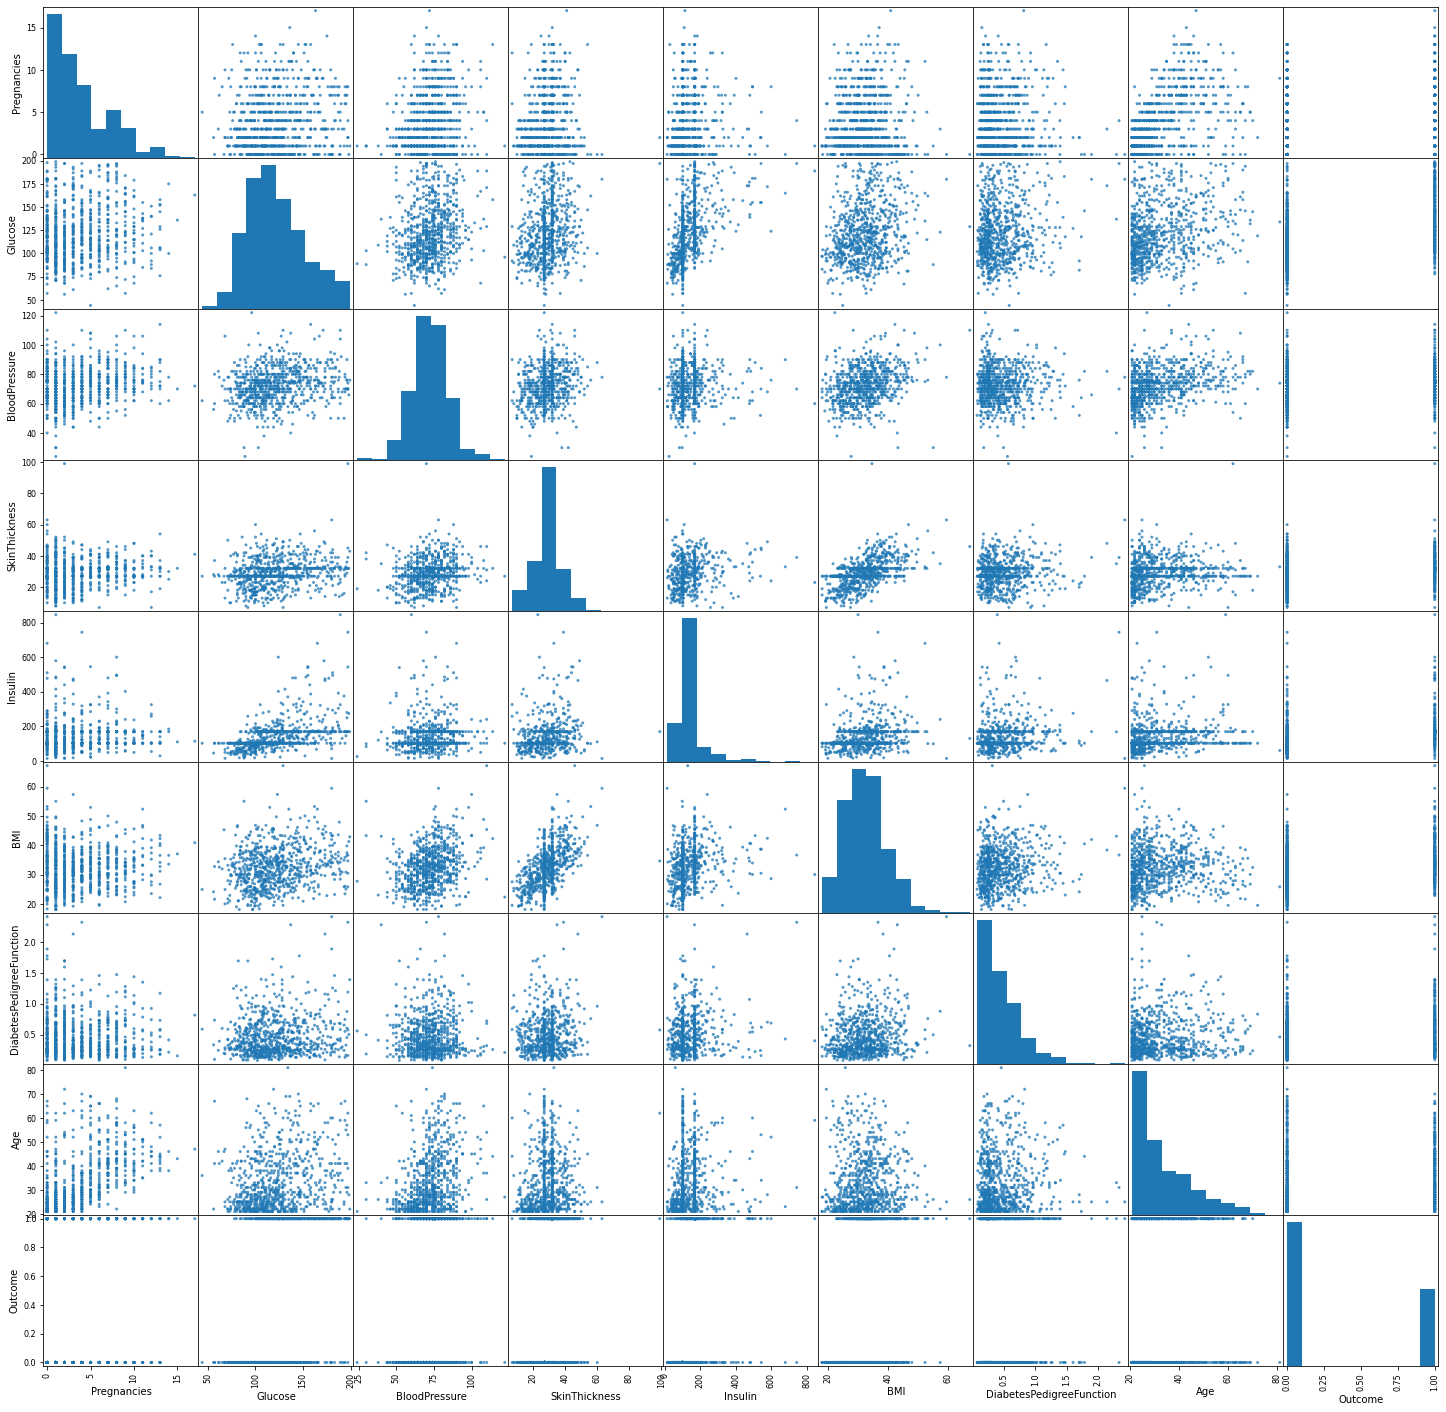

In [0]:
# scatter plot of clean data
from pandas.plotting import scatter_matrix
scatter_matrix(df,alpha=0.75,figsize=(25,25))
plt.show()

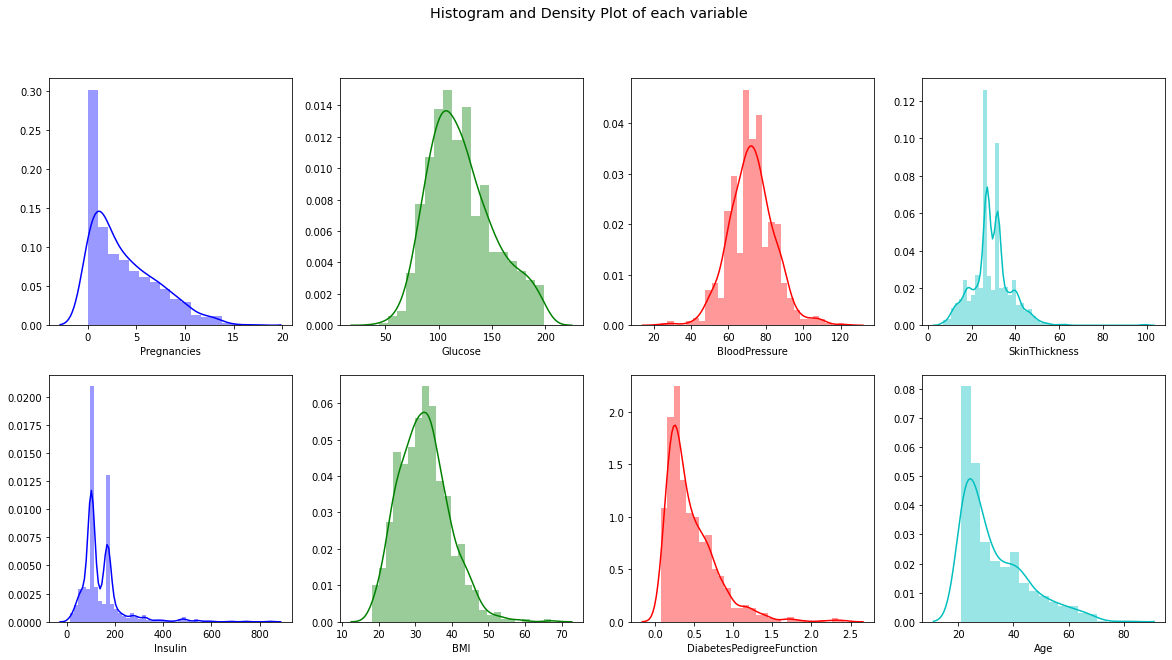

In [0]:
# visualizing distribution of each variable
n=df.shape[1]
fig, axs = plt.subplots(2, int(n/2), figsize = (20, 10))
colors = ['b','g','r','c','m','pink'] # to set color
try:
  for i, var in enumerate(df.columns.values): # iterating over each row in each column one by one
    if var == 'Outcome':
      axs[1, i-int(n/2)].set_xlabel(var, fontsize = 'large')
      continue
    if i < int(n/2):
      sns.distplot(df[var], color = colors[i], ax = axs[0, i])
    else:
      sns.distplot(df[var], color = colors[i-int(n/2)], ax = axs[1, i-int(n/2)])  
      plt.suptitle('Histogram and Density Plot of each variable', fontsize = 'x-large')
except IndexError: 
  print('') # exception handling required because for odd number of attributes an index error arises
plt.show()

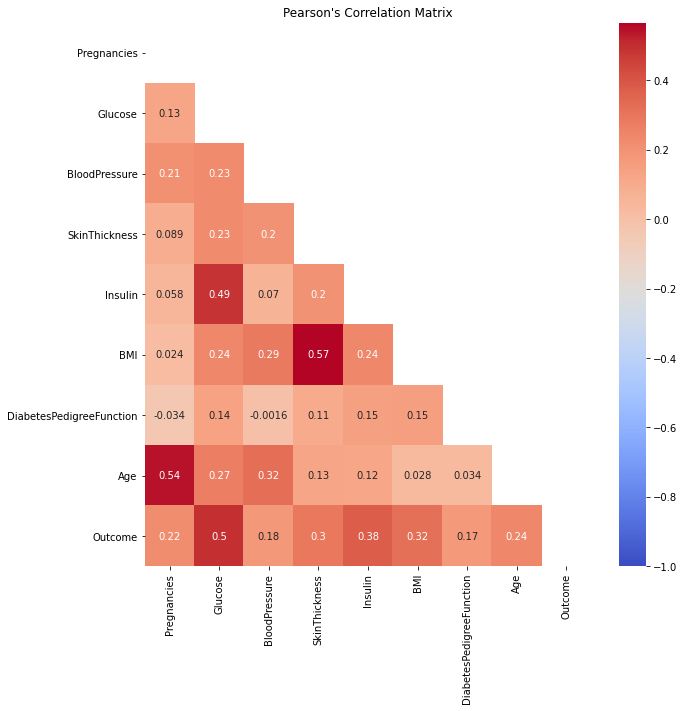

In [0]:
# Pearson's correlation matrix
cm = df.corr()
mask = np.zeros_like(cm, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True # removes upper triangle of correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True,
            vmin=-1,cmap='coolwarm',
            mask=mask)
plt.title('Pearson\'s Correlation Matrix')
plt.show()

In [0]:
# checking outcome class correlation with other variables
cm['Outcome'].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.495971
Insulin                     0.376796
BMI                         0.315577
SkinThickness               0.295138
Age                         0.238356
Pregnancies                 0.221898
BloodPressure               0.175615
DiabetesPedigreeFunction    0.173844
Name: Outcome, dtype: float64

From this we can assume that Glucose, BMI, Age and Pregnancies are our most important attributes.

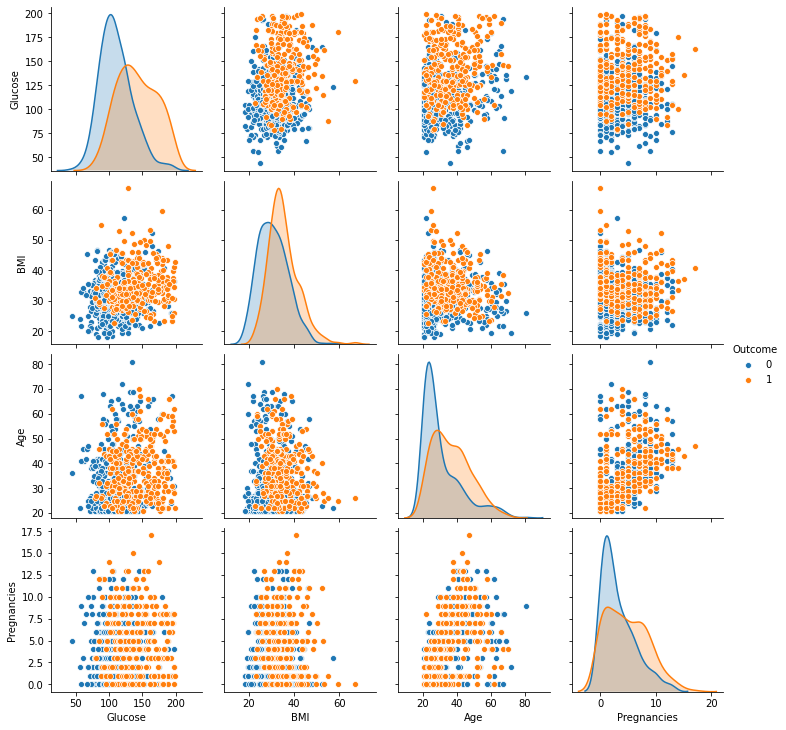

In [0]:
# scatter plot of clean data
imp_attributes = ['Glucose','BMI','Age','Pregnancies','Outcome']
plt.figsize=(12, 8)
sns.pairplot(df[imp_attributes],
             hue='Outcome',
             diag_kind='kde')
plt.show()

The histogram on the diagonal shows us the distribution of a single variable whereas the scatter plots show the relationship between two variables. 
If we change the diag_kind parameter the diagonal contains density plots. 

## Model Selection

For this purpose we will check out different classification algorithms and choose a relevant metric to test our models.
Since we have imbalanced classes and our aim is to check for diabetes, false positives aren't very alarming. On the other hand, false negatives can be very harmful to us and so the metric we choose is **recall**.

Recall = True Positive/Predicted Results = TP/(TP+FN)

We use recall because it allows us to capture the false negative cases, i.e. cases which our classifier deemed a patient to be non-diabetic but in reality the patient is actually diabetic. 

In [0]:
np.random.seed(42) # to make the output of this notebook identical each time
X = df.drop('Outcome',axis=1)
y = df['Outcome']
print(X.shape,y.shape)

(768, 8) (768,)


In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X,y))
print(X_scaled.head())

          0         1         2  ...         5         6         7
0  0.639947  0.864119 -0.033036  ...  0.169483  0.468492  1.425995
1 -0.844885 -1.205353 -0.528896  ... -0.848549 -0.365061 -0.190672
2  1.233880  2.013826 -0.694183  ... -1.328478  0.604397 -0.105584
3 -0.844885 -1.073958 -0.528896  ... -0.630399 -0.920763 -1.041549
4 -1.141852  0.502783 -2.677624  ...  1.551096  5.484909 -0.020496

[5 rows x 8 columns]


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42) 
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(576, 8) (192, 8)
(576,) (192,)


### Logistic Regression

In [0]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
model_lr = lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(y_test,y_pred_lr)

array([[100,  23],
       [ 26,  43]])

This doesn't really look that pretty so let's fix it up a little.

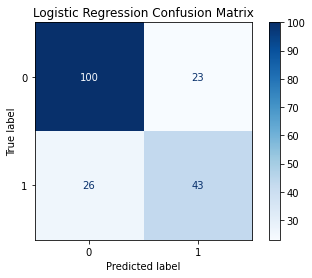

In [0]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(lr,X_test,y_test,
                      cmap=plt.cm.Blues,
                      values_format='g')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

Now let's have a look at the classification report for Logistic Regression

In [0]:
print(classification_report(y_test,y_pred_lr,labels=[0,1]))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80       123
           1       0.65      0.62      0.64        69

    accuracy                           0.74       192
   macro avg       0.72      0.72      0.72       192
weighted avg       0.74      0.74      0.74       192



Therefore for Logistic Regression we obtain a recall of **0.72**

### Gaussian Naive Bayes

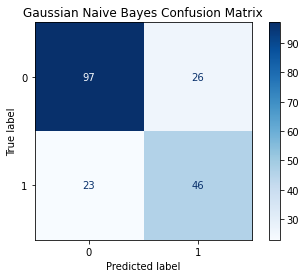

In [0]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
model_gnb = gnb.fit(X_train,y_train)
y_pred_gnb = gnb.predict(X_test)
plot_confusion_matrix(gnb,X_test,y_test,
                      cmap=plt.cm.Blues,
                      values_format='g')
plt.title('Gaussian Naive Bayes Confusion Matrix')
plt.show()

In [0]:
print(classification_report(y_test,y_pred_gnb,labels=[0,1]))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80       123
           1       0.64      0.67      0.65        69

    accuracy                           0.74       192
   macro avg       0.72      0.73      0.73       192
weighted avg       0.75      0.74      0.75       192



Gaussian NB Classifier has a recall of **0.73**

### Stochastic Gradient Descent


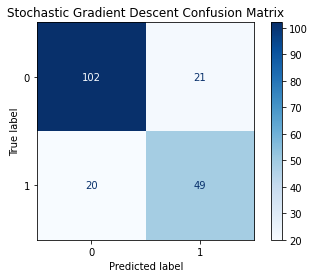

In [0]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
model_sgd = sgd.fit(X_train,y_train)
y_pred_sgd = sgd.predict(X_test)
plot_confusion_matrix(sgd,X_test,y_test,
                      cmap=plt.cm.Blues,
                      values_format='g')
plt.title('Stochastic Gradient Descent Confusion Matrix')
plt.show()

In [0]:
print(classification_report(y_test,y_pred_sgd,labels=[0,1]))

              precision    recall  f1-score   support

           0       0.84      0.83      0.83       123
           1       0.70      0.71      0.71        69

    accuracy                           0.79       192
   macro avg       0.77      0.77      0.77       192
weighted avg       0.79      0.79      0.79       192



Our SGD Classifier gives us a recall of **0.74**

### K-Nearest Neighbors

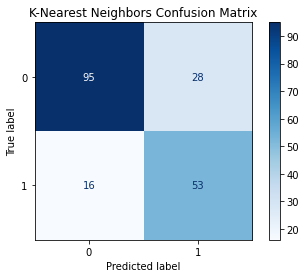

In [0]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
model_knn = knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)
plot_confusion_matrix(knn,X_test,y_test,
                      cmap=plt.cm.Blues,
                      values_format='g')
plt.title('K-Nearest Neighbors Confusion Matrix')
plt.show()

In [0]:
print(classification_report(y_test,y_pred_knn,labels=[0,1]))

              precision    recall  f1-score   support

           0       0.86      0.77      0.81       123
           1       0.65      0.77      0.71        69

    accuracy                           0.77       192
   macro avg       0.76      0.77      0.76       192
weighted avg       0.78      0.77      0.77       192



The KNN Classifier has a recall of **0.77**

### Bernoulli Naive Bayes

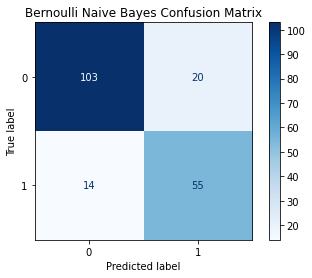

In [0]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
model_bnb = bnb.fit(X_train,y_train)
y_pred_bnb = bnb.predict(X_test)
plot_confusion_matrix(bnb,X_test,y_test,
                      cmap=plt.cm.Blues,
                      values_format='g')
plt.title('Bernoulli Naive Bayes Confusion Matrix')
plt.show()

In [0]:
print(classification_report(y_test,y_pred_bnb,labels=[0,1]))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86       123
           1       0.73      0.80      0.76        69

    accuracy                           0.82       192
   macro avg       0.81      0.82      0.81       192
weighted avg       0.83      0.82      0.82       192



The Bernoulli Naive Bayes has a recall of **0.82**

### Support Vector Machine

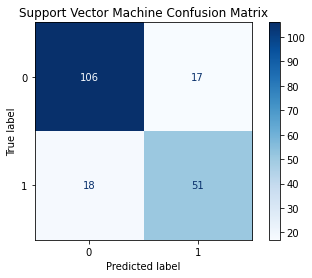

In [0]:
from sklearn.svm import SVC
svm  = SVC()
model_svm = svm.fit(X_train,y_train)
y_pred_svm = svm.predict(X_test)
plot_confusion_matrix(svm,X_test,y_test,
                      cmap=plt.cm.Blues,
                      values_format='g')
plt.title('Support Vector Machine Confusion Matrix')
plt.show()

Our SVM classifier does much better and obtains a recall of **0.80**

In [0]:
print(classification_report(y_test,y_pred_svm,labels=[0,1]))

              precision    recall  f1-score   support

           0       0.85      0.86      0.86       123
           1       0.75      0.74      0.74        69

    accuracy                           0.82       192
   macro avg       0.80      0.80      0.80       192
weighted avg       0.82      0.82      0.82       192



### Decision Tree

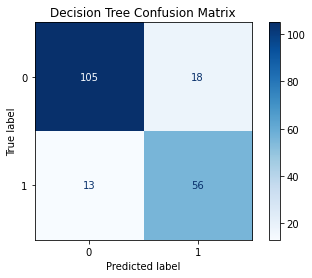

In [0]:
from sklearn.tree import DecisionTreeClassifier
dtc  = DecisionTreeClassifier()
model_dtc = dtc.fit(X_train,y_train)
y_pred_dtc = dtc.predict(X_test)
plot_confusion_matrix(dtc,X_test,y_test,
                      cmap=plt.cm.Blues,
                      values_format='g')
plt.title('Decision Tree Confusion Matrix')
plt.show()

In [0]:
print(classification_report(y_test,y_pred_dtc,labels=[0,1]))

              precision    recall  f1-score   support

           0       0.89      0.85      0.87       123
           1       0.76      0.81      0.78        69

    accuracy                           0.84       192
   macro avg       0.82      0.83      0.83       192
weighted avg       0.84      0.84      0.84       192



Decision Tree classifier has a recall of **0.84**

### AdaBoost Classifier

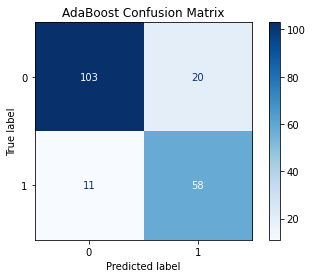

In [0]:
from sklearn.ensemble import AdaBoostClassifier
ada  = AdaBoostClassifier()
model_ada = ada.fit(X_train,y_train)
y_pred_ada = ada.predict(X_test)
plot_confusion_matrix(ada,X_test,y_test,
                      cmap=plt.cm.Blues,
                      values_format='g')
plt.title('AdaBoost Confusion Matrix')
plt.show()

In [0]:
print(classification_report(y_test,y_pred_ada,labels=[0,1]))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87       123
           1       0.74      0.84      0.79        69

    accuracy                           0.84       192
   macro avg       0.82      0.84      0.83       192
weighted avg       0.85      0.84      0.84       192



The AdaBoost classifier has a recall of **0.84**

### Random Forest

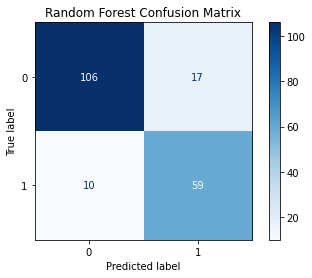

In [0]:
from sklearn.ensemble import RandomForestClassifier
rfc  = RandomForestClassifier()
model_rfc = rfc.fit(X_train,y_train)
y_pred_rfc = rfc.predict(X_test)
plot_confusion_matrix(rfc,X_test,y_test,
                      cmap=plt.cm.Blues,
                      values_format='g')
plt.title('Random Forest Confusion Matrix')
plt.show()

In [0]:
print(classification_report(y_test,y_pred_rfc,labels=[0,1]))

              precision    recall  f1-score   support

           0       0.91      0.86      0.89       123
           1       0.78      0.86      0.81        69

    accuracy                           0.86       192
   macro avg       0.85      0.86      0.85       192
weighted avg       0.86      0.86      0.86       192



Random Forest classifier has a recall of **0.86**

Therefore, we observe that the best base model obtained is that of the Random Forest Classifier and we shall try to find its best recall by using grid search.

## Hyperparameter Tuning
### Grid Search for Random Forest

In [0]:
from sklearn.model_selection import GridSearchCV
param_grid = [
    {'n_estimators': [25, 50, 75, 100, 125, 150, 200],
     'max_features': [2, 3, 4, 5, 6]}
  ]


grid_search = GridSearchCV(rfc, param_grid, cv=10,
                           scoring='recall',
                           return_train_score=True)
grid_search.fit(X_scaled, y)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

In [0]:
grid_search.best_params_

{'max_features': 5, 'n_estimators': 200}

In [0]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=5,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
grid_search.best_score_

0.8361823361823362

### Cross validation for Random Forest Classifier

In [0]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
rfc_cv = RandomForestClassifier(n_estimators=125,max_features=4)
cv = StratifiedKFold(n_splits=10)
scores = cross_val_score(rfc_cv, X_scaled, y, scoring='recall', cv=cv, verbose=2, n_jobs=-1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.3s finished


In [0]:
print(scores)

[0.85185185 0.81481481 0.7037037  0.96296296 0.62962963 0.88888889
 0.77777778 0.92592593 0.88461538 0.84615385]


In [0]:
print(scores.mean())

0.8286324786324787
